In [158]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import pow, exp, sin, pi

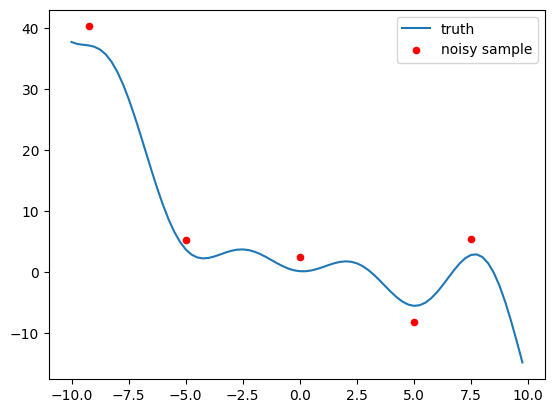

In [168]:
def f(x): return np.sin(x) * x - np.pow(x - 2, 3) / 40
def sample(x): return f(x) + np.random.normal(scale=2.5, size=x.shape)

grid = np.arange(-10, 10, 0.25)
grid_len = len(grid)
y = f(grid)

train_idx = [3, 20, 40, 60, 70]
train_x = np.array([grid[i] for i in train_idx])
train_ys = sample(train_x)

plt.plot(grid, y, label="truth")
# plt.plot(grid, ys, label="noisy sample")
plt.scatter(train_x, train_ys, color="red", label="noisy sample", marker="o", s=20)
plt.legend()
plt.show()

In [ ]:
# TODO: these are still wrong!
def kernel(n, f):
  kernel = np.zeros(shape=(n,n))
  coord = lambda x: (x - n//2) / (n//2)
  for i in range(n):
    for j in range(n):
      kernel[i][j] = f(coord(i), coord(j))
  return kernel

def gen_rbf(n, sigma=0.8, l=0.8):
  return kernel(n, lambda i, j: pow(sigma, 2) * exp(-pow(abs(i - j), 2) / (2 * pow(l, 2))))

def gen_periodic(n, sigma=0.8, l=0.8, p=0.5):
  f = lambda i, j: pow(sigma, 2) * exp(-2 * pow(sin(pi * abs(i - j) / p), 2)) / pow(l, 2)
  return kernel(n, f)

def gen_linear(n, sigma=0.3, sigmab=0.8, c=0):
  f = lambda i, j: pow(sigmab, 2) + pow(sigma, 2) * (i - c) * (j - c)
  return kernel(n, f)

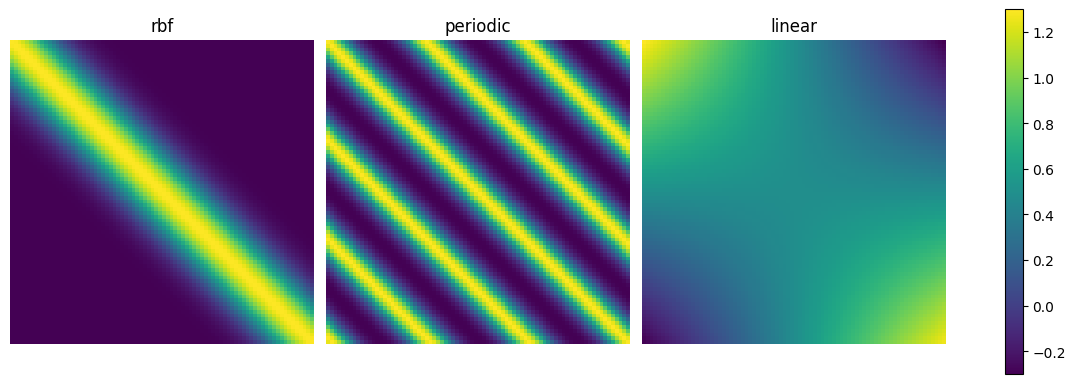

In [ ]:
rbf = gen_rbf(grid_len, sigma=0.8, l=0.2)
periodic = gen_periodic(grid_len, sigma=0.8, l=0.5, p=0.65)
linear = gen_linear(grid_len, sigma=0.7, sigmab=0.7)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
titles = ["rbf", "periodic", "linear"]

for ax, grid, title in zip(axes, [rbf, periodic, linear], titles):
  im = ax.imshow(grid, cmap="viridis")
  ax.set_title(title)
  ax.axis("off")
plt.tight_layout()
cbar = fig.colorbar(im, ax=axes, location='right')
plt.show()